In [611]:
#Importacion de bibliotecas
import pandas as pd 
import numpy as np
#import chardet


Analisis preliminar de la data

In [612]:

df = pd.read_csv("TP1_data.csv",  sep= ";", thousands= ',', decimal = '.')
#Elimino los tabs del dataFrame habia tabs en las dos ultimas columnas
df = df.replace('\t', '', regex=True)
df.info() #Observo que hay datos faltantes en Toneladas pedidas, Tiempo de Carga y Tiempo de Entrega
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #Pedido                  1000 non-null   object 
 1   Fecha Ingreso Pedido     1000 non-null   object 
 2   Hora Ingreso Pedido      1000 non-null   int64  
 3   Destino                  1000 non-null   object 
 4   Toneladas Pedidas        997 non-null    float64
 5   Tiempo de Carga (min)    999 non-null    object 
 6   Tiempo de Entrega (min)  997 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


(1000, 7)

Renombramiento de Columnas

In [613]:
#Replazo los espacion por guion bajo
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df = df.rename(columns={'#Pedido' : 'Pedido'})

df.head(5)

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
0,#0901003,1/1/22,14,Junín,6.0,40,41
1,#0901004,1/1/22,11,Tandil,5.0,21,410
2,#0901005,1/1/22,15,Junín,10.0,32,41
3,#0901006,1/2/22,9,Tandil,5.0,30,38
4,#0901007,1/2/22,14,Junín,5.0,39,45


FALTANTES


In [614]:
#Asigno faltantes para filtrar
faltantes = df.isnull()

#Veo donde faltan los resultados
total_faltantes = faltantes.sum()

print(total_faltantes) #Faltan 7 datos

#Chequeo si los faltantes estan todos en la misma linea o en diferentes
print(faltantes.value_counts()) #faltan en 7 filas diferentes

#Filas con datos faltantes
faltantes_por_columna = faltantes.sum(axis=1).astype(bool)

filas_con_faltantes = df[faltantes_por_columna]

filas_con_faltantes

Pedido                     0
Fecha_Ingreso_Pedido       0
Hora_Ingreso_Pedido        0
Destino                    0
Toneladas_Pedidas          3
Tiempo_de_Carga_(min)      1
Tiempo_de_Entrega_(min)    3
dtype: int64
Pedido  Fecha_Ingreso_Pedido  Hora_Ingreso_Pedido  Destino  Toneladas_Pedidas  Tiempo_de_Carga_(min)  Tiempo_de_Entrega_(min)
False   False                 False                False    False              False                  False                      993
                                                                                                      True                         3
                                                            True               False                  False                        3
                                                            False              True                   False                        1
Name: count, dtype: int64


,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
33,#0901036,1/15/22,17,Junín,NaN,37,39
248,#0901251,3/29/22,17,Junín,NaN,21,43
285,#0901288,4/8/22,10,Mar del Plata,NaN,39,49
346,#0901349,5/1/22,11,Junín,12.0,29,NaN
488,#0901491,6/24/22,16,La Plata,6.0,25,NaN
601,#0901604,8/3/22,16,Mar del Plata,8.0,28,NaN
920,#0901923,11/29/22,9,Mar del Plata,10.0,NaN,43


Limpio la data
    -Pedidos
        ~Elimno el #
        ~Cambio el tipo de dato a int
    -Fecha_Ingreso_Pedido 
        ~Cambiar tipo de dato a fecha
    -Hora_Ingreso_Pedido (OK)
    -Destino
        ~Pasar a category
    -Toneladas_Pedidas (OK)
    -Tiempo_de_Carga
        ~Elimino los dos primero caracteres
        ~Modifico a int
    - Tiempo_de_Entrega
        ~idem anterior

In [615]:
#Pedido
#Elimino el "#"
df.Pedido = df.Pedido.astype(str)
df['Pedido'] = df['Pedido'].str.replace('#', '')
#Modifico el tipo a int
df.Pedido = df.Pedido.astype(int)

#Fecha Ingreso Pedido to_datetime
df['Fecha_Ingreso_Pedido'] = pd.to_datetime(df['Fecha_Ingreso_Pedido'])

#Destino --> Category
df.Destino = pd.Categorical(df['Destino'])
df.head()
df.info()

C:\Users\rjiam\AppData\Local\Temp\ipykernel_11316\3967202240.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha_Ingreso_Pedido'] = pd.to_datetime(df['Fecha_Ingreso_Pedido'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      1000 non-null   int64         
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    999 non-null    object        
 6   Tiempo_de_Entrega_(min)  997 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 44.8+ KB


In [616]:
#Reviso columna Hora_Ingreso_Pedido

df['Hora_Ingreso_Pedido'].describe() #Hay por lo menos un valor que es > 24
#Chequeo cuantos hay, encuentro solamente uno
hora_fuera_de_rango = df[df["Hora_Ingreso_Pedido"] > 23] # Hay solo un dato
#hora_fuera_de_rango

df.loc[hora_fuera_de_rango.index, 'Hora_Ingreso_Pedido'] = np.nan
hora_fuera_de_rango

df[df['Hora_Ingreso_Pedido'] == np.nan]

df.loc[189]
# df = df.drop(hora_fuera_de_rango.index)#Elimino la fila, se puede hacer algo mejor
# df.head()

Pedido                                  901192
Fecha_Ingreso_Pedido       2022-03-05 00:00:00
Hora_Ingreso_Pedido                        NaN
Destino                                  Junín
Toneladas_Pedidas                         12.0
Tiempo_de_Carga_(min)                      28 
Tiempo_de_Entrega_(min)                    47 
Name: 189, dtype: object

In [617]:
#Destino
print(df['Destino'].cat.categories)#Todas las

serie_categorias = df['Destino'].value_counts() # Veo que los nombres correctos son los 5 primeros

#Uso el .index e itero sobre los primeros 5 valores
dict_categorias = serie_categorias.to_dict()

indice = serie_categorias.index

for i in indice:
    dict_categorias[i] = ''

#Hago los primeros 5 de manera automatica
for i in range(0,5):
    dict_categorias[indice[i]] = indice[i]

# A mano uno por uno hay que reemplazar por el nombre correcto
dict_categorias['MDQ'] = indice[0]
dict_categorias['Mar delPlata'] = indice[0]
dict_categorias['Mardel Plata'] = indice[0] 
dict_categorias['Mardel'] = indice[0]
dict_categorias['Juní n'] = indice[1] 
dict_categorias['Junin'] = indice[1]
dict_categorias['JUNIN'] = indice[1]
dict_categorias[' Tandil'] = indice[2]
dict_categorias['TANDIL'] = indice[2]
dict_categorias['Tandill'] = indice[2]
dict_categorias['LA PLATA'] = indice[3]
dict_categorias['LaPlata'] = indice[3]
dict_categorias['Olavarria'] = indice[4]
print(dict_categorias)


Index([' Tandil', 'JUNIN', 'Junin', 'Juní n', 'Junín', 'LA PLATA', 'La Plata',
       'LaPlata', 'MDQ', 'Mar del Plata', 'Mar delPlata', 'Mardel',
       'Mardel Plata', 'Olavarria', 'Olavarría', 'TANDIL', 'Tandil',
       'Tandill'],
      dtype='object')
{'Mar del Plata': 'Mar del Plata', 'Junín': 'Junín', 'Tandil': 'Tandil', 'La Plata': 'La Plata', 'Olavarría': 'Olavarría', 'MDQ': 'Mar del Plata', 'Olavarria': 'Olavarría', 'JUNIN': 'Junín', 'Mardel': 'Mar del Plata', 'TANDIL': 'Tandil', 'Mardel Plata': 'Mar del Plata', ' Tandil': 'Tandil', 'Mar delPlata': 'Mar del Plata', 'LaPlata': 'La Plata', 'LA PLATA': 'La Plata', 'Juní n': 'Junín', 'Junin': 'Junín', 'Tandill': 'Tandil'}


In [618]:
#Mapeo el diccionario para no tener incosistencia en los nombres de la ciudades
df['Destino'] = df['Destino'].map(dict_categorias)
df['Destino'] = pd.Categorical(df['Destino'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      999 non-null    float64       
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    999 non-null    object        
 6   Tiempo_de_Entrega_(min)  997 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 44.3+ KB


In [619]:
#Elimine los espacios de las últimas dos columnas
df['Tiempo_de_Carga_(min)'] = df['Tiempo_de_Carga_(min)'].replace(' ', '')
df['Tiempo_de_Entrega_(min)'] = df['Tiempo_de_Entrega_(min)'].replace(' ', '')

Agrego uina columna con los dias de la semana

In [620]:
#Fechas
#Dia de semana
df['Dia_Semana'] = df['Fecha_Ingreso_Pedido'].dt.dayofweek
df['Dia_Semana'] = df.Dia_Semana.astype(int)

dias = ['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']

for day in dias:
    df.loc[df['Dia_Semana'] == dias.index(day), 'Dia_Semana'] = day

df.Dia_Semana = pd.Categorical(df['Dia_Semana'])

Eliminé toda las filas com datos nulos(se puede hacer algo mejor)

In [621]:
#Tiempo de carga
#Hay datos que no son numeros!!!!
#Armo una funcion para ver cuales son
expresion_regular = '\d' #Es solo numeros (REVISAR -- > FUNCIONA BIEN PERO A MI ENTENDER DEBERIAMOS SELECCIONAR DE LA FORMA OPUESTA)

filter_criteria = df['Tiempo_de_Carga_(min)'].str.contains(expresion_regular, regex = True)
print(filter_criteria)
no_numericos_tiempo_de_carga  = df[np.logical_not(filter_criteria)]
#Modifico el contenido de las columnas a NaN
df.loc[no_numericos_tiempo_de_carga.index, 'Tiempo_de_Carga_(min)'] = np.nan
#Muestro entradas elimindas
#no_numericos_tiempo_de_carga.index

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Tiempo_de_Carga_(min), Length: 1000, dtype: object


In [622]:
#Tiempo de Entrega
#Selecciono datos que no son numeros
filter_criteria = df['Tiempo_de_Entrega_(min)'].str.contains(expresion_regular, regex = True)
#Reemplazo por Nan
no_numericos_tiempo_de_entrega = df[np.logical_not(filter_criteria)]
df.loc[no_numericos_tiempo_de_entrega.index, 'Tiempo_de_Entrega_(min)'] = np.nan
#Muestro las filas elimindas


In [623]:
#Modifico los datos de Tiempo de Carga y Tiempo de Entrega a numeric (LO IDEAL ES A INT PERO HAY SEPARADOR DECIMAL'.' Y NO ENCONTRÉ COMO HACERLO)
df['Tiempo_de_Carga_(min)'] = pd.to_numeric(df['Tiempo_de_Carga_(min)'])
df['Tiempo_de_Entrega_(min)'] = pd.to_numeric(df['Tiempo_de_Entrega_(min)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      999 non-null    float64       
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    995 non-null    float64       
 6   Tiempo_de_Entrega_(min)  996 non-null    float64       
 7   Dia_Semana               1000 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(4), int32(1)
memory usage: 45.6 KB


~AGREGO COLUMNAS DE INTERES PARA EL ENUNCIADO~

In [624]:
#Agrego columna Tons_OK si las toneladas estan entre 3 y 12 includos (PREGUNTAR SI SE INCLUYEN)
df.loc[(df['Toneladas_Pedidas'] <= 12) & (df['Toneladas_Pedidas'] >=3), 'Tons_OK'] = True
df['Tons_OK'] = df['Tons_OK'].fillna(value= False)
df['Tons_OK'] = df['Tons_OK'].astype(bool)
df.shape

(1000, 9)

In [625]:
#Tarifa = 15$ * tons * distancia
#Armo DataFrame con las distancias
distancias = {'Destino' : ['La Plata', 'Mar del Plata', 'Tandil', 'Junín', 'Olavarría'],
              'Distancia' : [86,443, 363, 251, 361]}
distancias = pd.DataFrame(distancias)
distancias['Destino'] = pd.Categorical(distancias['Destino'])
#Uno los dataframes
df = df.merge(distancias, how = 'inner', on = 'Destino')

df['Tarifa'] = 15 * df['Distancia'] * df['Toneladas_Pedidas']
df['Tarifa'] = df['Tarifa'].astype(float)
df.head()
#df['Tarifa'] = 15 * df['Distancia'] * df['Toneladas_Pedidas']

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Dia_Semana,Tons_OK,Distancia,Tarifa
0,901003,2022-01-01,14.0,Junín,6.0,40.0,41.0,SA,True,251,22590.0
1,901005,2022-01-01,15.0,Junín,10.0,32.0,41.0,SA,True,251,37650.0
2,901007,2022-01-02,14.0,Junín,5.0,39.0,45.0,DO,True,251,18825.0
3,901008,2022-01-03,12.0,Junín,10.0,37.0,37.0,LU,True,251,37650.0
4,901010,2022-01-04,15.0,Junín,9.0,37.0,36.0,MA,True,251,33885.0


In [641]:
#Costo por km camión

df['Costo_variable_camion'] = df['Distancia'] * 13
print(df.columns)

df = df[['Pedido', 'Fecha_Ingreso_Pedido', 'Dia_Semana', 'Hora_Ingreso_Pedido', 'Destino',
       'Toneladas_Pedidas', 'Tons_OK', 'Tiempo_de_Carga_(min)', 'Tiempo_de_Entrega_(min)', 'Distancia', 'Tarifa',
       'Costo_variable_camion']]
df

Index(['Pedido', 'Fecha_Ingreso_Pedido', 'Dia_Semana', 'Hora_Ingreso_Pedido',
       'Destino', 'Toneladas_Pedidas', 'Tons_OK', 'Tiempo_de_Carga_(min)',
       'Tiempo_de_Entrega_(min)', 'Distancia', 'Tarifa',
       'Costo_variable_camion'],
      dtype='object')


,Pedido,Fecha_Ingreso_Pedido,Dia_Semana,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tons_OK,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Distancia,Tarifa,Costo_variable_camion
0,901003,2022-01-01,SA,14.0,Junín,6.0,True,40.0,41.0,251,22590.0,3263
1,901005,2022-01-01,SA,15.0,Junín,10.0,True,32.0,41.0,251,37650.0,3263
2,901007,2022-01-02,DO,14.0,Junín,5.0,True,39.0,45.0,251,18825.0,3263
3,901008,2022-01-03,LU,12.0,Junín,10.0,True,37.0,37.0,251,37650.0,3263
4,901010,2022-01-04,MA,15.0,Junín,9.0,True,37.0,36.0,251,33885.0,3263
...,...,...,...,...,...,...,...,...,...,...,...,...
995,901856,2022-11-10,JU,13.0,Olavarría,8.0,True,39.0,41.0,361,43320.0,4693
996,901869,2022-11-14,LU,15.0,Olavarría,12.0,True,33.0,37.0,361,64980.0,4693
997,901870,2022-11-14,LU,16.0,Olavarría,6.0,True,34.0,45.0,361,32490.0,4693
998,901900,2022-11-24,JU,16.0,Olavarría,6.0,True,22.0,37.0,361,32490.0,4693


In [642]:
#Exportacion de data limpia
df.to_csv('TP1_datalimpia.csv', sep = ';')

In [627]:
#Importamos matplotlib.pyplot
import matplotlib.pyplot as plt


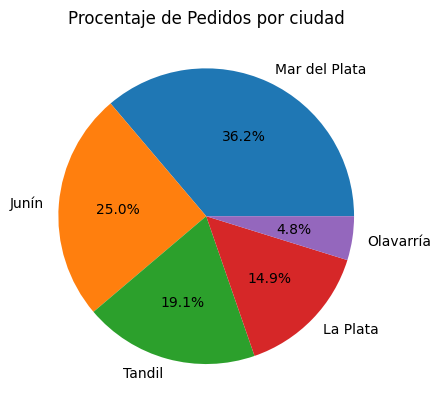

In [628]:
#Analisis de pedidos por ciudad
counts = df['Destino'].value_counts()
plt.pie(counts.values, labels = counts.index, autopct= '%1.1f%%')
plt.title(label = "Procentaje de Pedidos por ciudad")
plt.show()

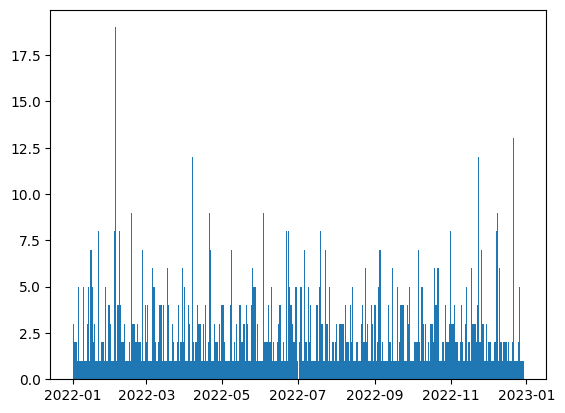

In [629]:
fecha = df['Fecha_Ingreso_Pedido']

plt.hist(fecha.values, bins = 365)
plt.show()


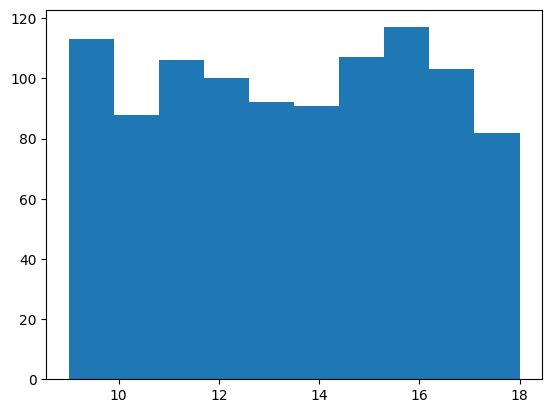

count    999.000000
mean      13.450450
std        2.864911
min        9.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       18.000000
Name: Hora_Ingreso_Pedido, dtype: float64

In [630]:
#Hago un grafico para ver las distribucion por hora

plt.hist(df['Hora_Ingreso_Pedido'], bins = 10)
plt.show()
df['Hora_Ingreso_Pedido'].describe() #Rango de datos entre las 9-18hs ->POSIBLE HORARIO DE ATENCION

In [631]:
#Hora por dia de la semana



['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']


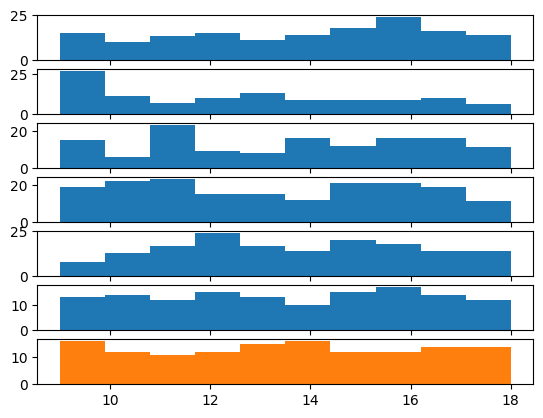

In [632]:
#Hago un histograma para ver como se ditribuyen los dias de pedido por ciudad (5GRAFICOS)
fig, ax =plt.subplots(7)

print(dias)
for dia in range(0,7):
    por_dia = df[df['Dia_Semana'] == dias[dia]]
    hora_por_dia = por_dia['Hora_Ingreso_Pedido']
    #print(hora_por_dia.values)
    ax[dia].hist(hora_por_dia.values)
    #ax[dia].title(dias[dia])


plt.hist(hora_por_dia)
plt.show()


In [633]:
import seaborn as sns

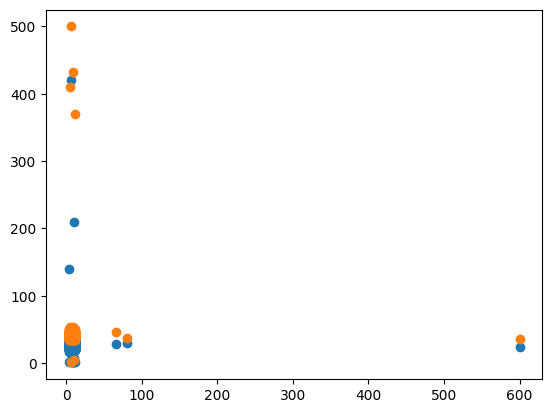

In [634]:
correlation_mat = df.corr(numeric_only= True)
#sns.heatmap(correlation_mat, annot = True)

plt.scatter(x = df['Toneladas_Pedidas'], y = df['Tiempo_de_Carga_(min)'],)
plt.scatter(x = df['Toneladas_Pedidas'], y = df['Tiempo_de_Entrega_(min)'])
plt.show()

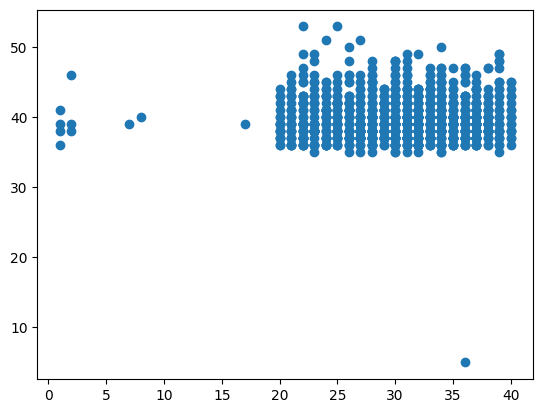

In [635]:
#plt.scatter(x = df['Tiempo_de_Carga_(min)'], y = df['Tiempo_de_Entrega_(min)'])
outlier_eliminados = df[(df['Tiempo_de_Carga_(min)'] < 100) & (df['Tiempo_de_Entrega_(min)'] < 100) ]
plt.scatter(x = outlier_eliminados['Tiempo_de_Carga_(min)'], y = outlier_eliminados['Tiempo_de_Entrega_(min)'])
plt.show()

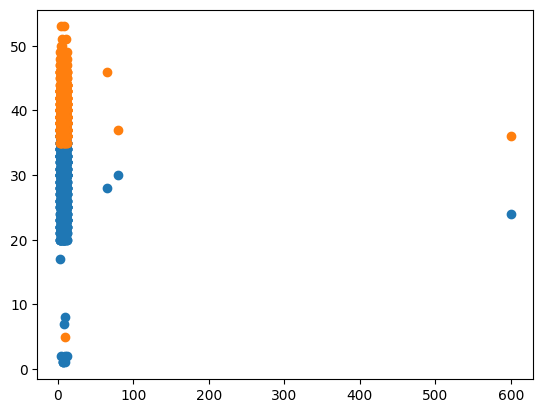

In [636]:
plt.scatter(x = outlier_eliminados['Toneladas_Pedidas'], y = outlier_eliminados['Tiempo_de_Carga_(min)'],)
plt.scatter(x = outlier_eliminados['Toneladas_Pedidas'], y = outlier_eliminados['Tiempo_de_Entrega_(min)'])
plt.show()